| Abbreviation   | Full Form                                 |
|:---------------|:------------------------------------------|
| FAVC           | Frequent consumption of high caloric food |
| FCVC           | Frequency of consumption of vegetables    |
| NCP            | Number of main meals                      |
| CAEC           | Consumption of food between meals         |
| CH20           | Consumption of water daily                |
| CALC           | Consumption of alcohol                    |
| SCC            | Calories consumption monitoring           |
| FAF            | Physical activity frequency               |
| TUE            | Time using technology devices             |
| MTRANS         | Transportation used                       |

In [54]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


df = pd.read_csv('df.csv')
df.shape

(2107, 20)

In [55]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'BMI', 'Outliers', 'Level'],
      dtype='object')

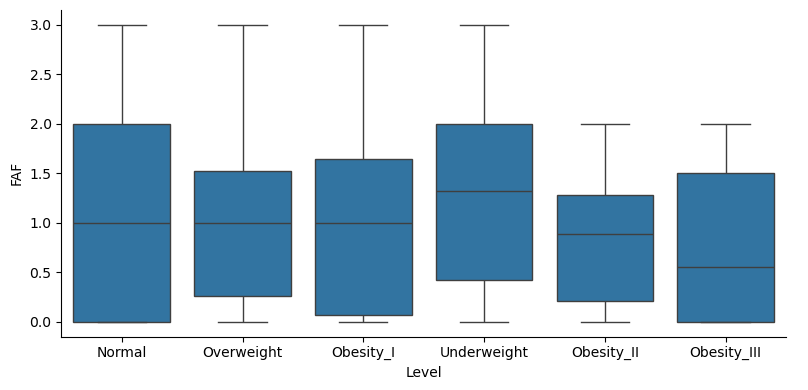

In [56]:
sns.catplot(
    data=df, x="Level", y="FAF", 
    kind="box", height=4, aspect=2,
)

In [57]:
dfv1 = df.groupby(['Level', 'MTRANS'])['Gender'].count().reset_index()
dfv1.columns = ['Level', 'Transport', 'Count']
dfv1

,Level,Transport,Count
0,Normal,Automobile,48
1,Normal,Bike,4
2,Normal,Motorbike,6
3,Normal,Public_Transportation,206
4,Normal,Walking,32
5,Obesity_I,Automobile,109
6,Obesity_I,Motorbike,3
7,Obesity_I,Public_Transportation,255
8,Obesity_I,Walking,3
9,Obesity_II,Automobile,97


In [58]:
fig = px.bar(dfv1, x='Level', y='Count', color = 'Transport')

fig.update_xaxes(categoryorder='array', categoryarray= ['Underweight', 'Normal', 'Overweight', 'Obesity_I', 'Obesity_II', 'Obesity_III'])
fig.show()

In [59]:
# Frequent consumption of high caloric food

dfv2 = df.groupby(['Level', 'FAVC'])['Gender'].count().reset_index()
dfv2.columns = ['Level', 'FAVC', 'Count']
fig = px.bar(dfv2, x='Level', y='Count', color = 'FAVC')

fig.update_xaxes(categoryorder='array', categoryarray= ['Underweight', 'Normal', 'Overweight', 'Obesity_I', 'Obesity_II', 'Obesity_III'])
fig.show()


In [60]:
# Vegetables consumptions

dfv3 = df.groupby(['Level', 'FCVC'])['Gender'].count().reset_index()
dfv3.columns = ['Level', 'FCVC', 'Count']
fig = px.bar(dfv3, x='Level', y='Count', color = 'FCVC')

fig.update_xaxes(categoryorder='array', categoryarray= ['Underweight', 'Normal', 'Overweight', 'Obesity_I', 'Obesity_II', 'Obesity_III'])
fig.show()


In [61]:
df.groupby(['Level', 'FCVC'])['Gender'].count().reset_index()

,Level,FCVC,Gender
0,Normal,1.000000,18
1,Normal,1.753750,1
2,Normal,1.773265,1
3,Normal,1.836554,1
4,Normal,1.972545,1
...,...,...,...
832,Underweight,2.977018,1
833,Underweight,2.979383,1
834,Underweight,2.984004,1
835,Underweight,2.984425,1


In [62]:
df['FCVC'].value_counts()

FCVC
3.000000    650
2.000000    600
1.000000     33
2.823179      2
2.214980      2
           ... 
2.706134      1
2.010684      1
2.300408      1
2.119643      1
2.680375      1
Name: count, Length: 808, dtype: int64

In [63]:
df = df.drop(columns = ['NObeyesdad', 'BMI', 'Outliers', 'Weight'])
df

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Level
0,Female,21.000000,1.620000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal
1,Female,21.000000,1.520000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal
2,Male,23.000000,1.800000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal
3,Male,27.000000,1.800000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight
4,Male,22.000000,1.780000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,Female,20.976842,1.710730,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_III
2103,Female,21.982942,1.748584,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_III
2104,Female,22.524036,1.752206,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_III
2105,Female,24.361936,1.739450,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_III


In [64]:
X = df.drop('Level', axis = 1)
y = df['Level']
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier()

cross_val_score(rf, X_train, y_train, cv=10)

array([0.81656805, 0.86390533, 0.84023669, 0.82840237, 0.85798817,
       0.85119048, 0.85119048, 0.83928571, 0.89285714, 0.85714286])

In [69]:
rf.fit(X_train, y_train)


RandomForestClassifier()

In [70]:
importances = rf.feature_importances_

In [71]:
importances

array([1.34204987e-01, 1.20379402e-01, 1.09055033e-01, 7.64129640e-02,
       8.40194429e-02, 8.06609494e-02, 7.77952436e-02, 2.91420104e-02,
       3.12660543e-02, 2.42882901e-02, 2.69665904e-02, 1.37523640e-02,
       1.31766262e-02, 4.35983242e-03, 2.32148769e-02, 2.47556482e-02,
       5.32739782e-03, 3.42101326e-03, 2.93091519e-03, 5.87431125e-03,
       5.91890652e-03, 4.98187513e-05, 4.72388486e-03, 2.75898263e-02,
       2.22272611e-02, 1.85227968e-02, 4.42578507e-04, 8.82998523e-04,
       2.30692471e-02, 5.56872924e-03])

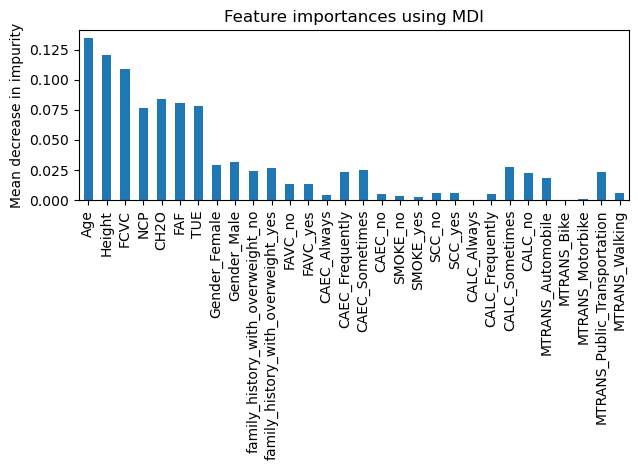

In [72]:
feature_names = X_train.columns
#std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar( ax=ax)

ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()